In [32]:
import os
import json
import matplotlib.pyplot as plt
from math import sqrt
from collections import Counter
import numpy as np
import pandas as pd

In [14]:
hvsams_directory_path = "hvsams"

length_adjusted_alignment_scores = []
if os.path.exists(hvsams_directory_path):
    for filename in os.listdir(hvsams_directory_path):
        if filename.endswith(".sam"):
            with open(hvsams_directory_path + "/" + filename) as inf:
                for line in inf:
                    if line.startswith("@"):
                        continue
                    else:
                        line = line.split("\t")
                        alignment_score = int(line[11].split(":")[2])
                        read_length = len(line[9])

                        length_adjusted_alignment_scores.append(
                            alignment_score / sqrt(read_length)
                        )



In [21]:
refseq_directory_path = "raw-genomes"

refseq_id_and_names = {}

for filename in os.listdir(refseq_directory_path):
    with open (os.path.join(refseq_directory_path, filename)) as inf:
        for line in inf:
            if line.startswith(">"):
                identifier, description = line[1:].split(' ', 1)
                identifier = str(identifier.strip())
                name = description.split(',', 1)[0]
                refseq_id_and_names[identifier] = name.strip()
            else:
                continue
        

print(refseq_id_and_names)

len(refseq_id_and_names.keys())


{'NC_043067.1': 'Bas-Congo virus isolate BASV-1 N protein gene', 'NC_007357.1': 'Influenza A virus (A/Goose/Guangdong/1/96(H5N1)) polymerase (PB2) gene', 'NC_007358.1': 'Influenza A virus (A/goose/Guangdong/1/1996(H5N1)) polymerase (PB1) and PB1-F2 protein (PB1-F2) genes', 'NC_007359.1': 'Influenza A virus (A/goose/Guangdong/1/1996(H5N1)) polymerase (PA) and PA-X protein (PA-X) genes', 'NC_007362.1': 'Influenza A virus (A/goose/Guangdong/1/1996(H5N1)) hemagglutinin (HA) gene', 'NC_007360.1': 'Influenza A virus (A/Goose/Guangdong/1/96(H5N1)) nucleocapsid protein (NP) gene', 'NC_007361.1': 'Influenza A virus (A/Goose/Guangdong/1/96(H5N1)) neuraminidase (NA) gene', 'NC_007363.1': 'Influenza A virus (A/goose/Guangdong/1/1996(H5N1)) segment 7', 'NC_007364.1': 'Influenza A virus (A/goose/Guangdong/1/1996(H5N1)) segment 8', 'NC_006554.1': 'Sapovirus C12 strain C12', 'NC_034487.1': 'Guaroa virus strain BeH22063 segment L', 'NC_034506.1': 'Guaroa virus strain BeH22063 segment M', 'NC_034486.1':

846

In [22]:
print(refseq_id_and_names['NC_055382.1'])

Medjerda Valley virus strain T131 segment M


In [48]:

low_quality_genomes = {}

counter = []

for filename in os.listdir(hvsams_directory_path):
    if filename.endswith(".sam"):
        with open(hvsams_directory_path + "/" + filename) as inf:
            for line in inf:
                if line.startswith("@"):
                    continue
                else:
                    line = line.split("\t")

                    reference_id = str(line[2])
                    alignment_score = int(line[11].split(":")[2])
                    read_length = len(line[9])

                    adjusted_alignment_score = alignment_score / sqrt(read_length)

                    genome_name = refseq_id_and_names[reference_id]


                    
                    if alignment_score / sqrt(read_length) < 7:
                        counter.append(genome_name)


                        if genome_name not in low_quality_genomes:
                            low_quality_genomes[genome_name] = [adjusted_alignment_score]
                        else:
                            low_quality_genomes[genome_name].append(adjusted_alignment_score)


# return 10 biggest lists in dictionary
                  
counter = Counter(counter)
print(counter.most_common(10))





[('Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1', 148978), ('Dengue virus 1', 38551), ('Dengue virus 2', 30362), ('Chikungunya virus', 17683), ('Husavirus sp. isolate 16370_59', 17009), ('Mamastrovirus 1 genomic RNA', 15985), ('Astrovirus MLB1', 14934), ('Human astrovirus', 13443), ('Human adenovirus F', 10881), ('Human astrovirus BF34', 7303)]


11687914


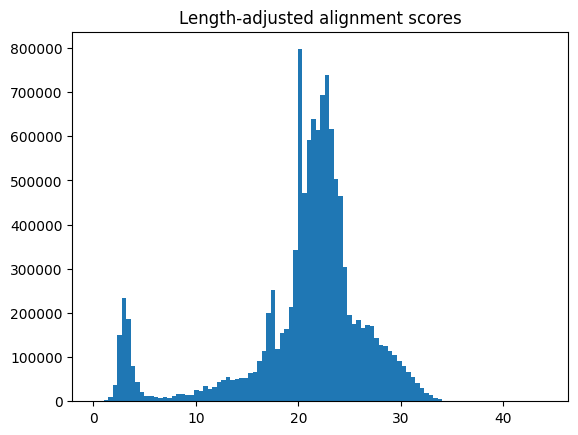

<Figure size 640x480 with 0 Axes>

In [49]:
if os.path.exists(hvsams_directory_path):
    for filename in os.listdir(hvsams_directory_path):
        if filename.endswith(".sam"):
            with open(hvsams_directory_path + "/" + filename) as inf:
                for line in inf:
                    if line.startswith("@"):
                        continue
                    else:
                        line = line.split("\t")
                        alignment_score = int(line[11].split(":")[2])
                        read_length = len(line[9])

                        length_adjusted_alignment_scores.append(
                            alignment_score / sqrt(read_length)
                        )

print(len(length_adjusted_alignment_scores))
plt.hist(length_adjusted_alignment_scores, bins=100)
plt.title("Length-adjusted alignment scores")
plt.show()
plt.clf()

In [5]:
hvreads_dir = "hvreads"

total_hvreads_entries = 0

for filename in os.listdir(hvreads_dir):
    if filename.endswith(".json"):
        with open(hvreads_dir + "/" + filename) as inf:
            with open(os.path.join(hvreads_dir, filename), 'r') as file:
                data = json.load(file)
                total_hvreads_entries += len(data)

print(f"Total entries in all hvreads files: {total_hvreads_entries}")


hvfastqs_dir = "hvfastqs"

total_fastq_entries = 0

for filename in os.listdir(hvfastqs_dir):
    if filename.endswith(".fastq"):
        with open(hvfastqs_dir + "/" + filename) as inf:
            for line in inf:
                if line.startswith("@"):
                    total_fastq_entries += 1
                else:
                    continue

print(f"Total entries in all fastq files: {total_fastq_entries}")



Total entries in all files: 4452507


AttributeError: 'list' object has no attribute 'startswith'

Total entries in all fastq files: 6269846
